In [1]:
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
# Use the same color cylcer as Seaborn
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import lsst.afw.table as afwTable
import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import nmf, proximal, display
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

INFO:lsst.meas.deblender.proximal:Total parents: 41
INFO:lsst.meas.deblender.proximal:Unblended sources: 25
INFO:lsst.meas.deblender.proximal:Sources with multiple peaks: 16


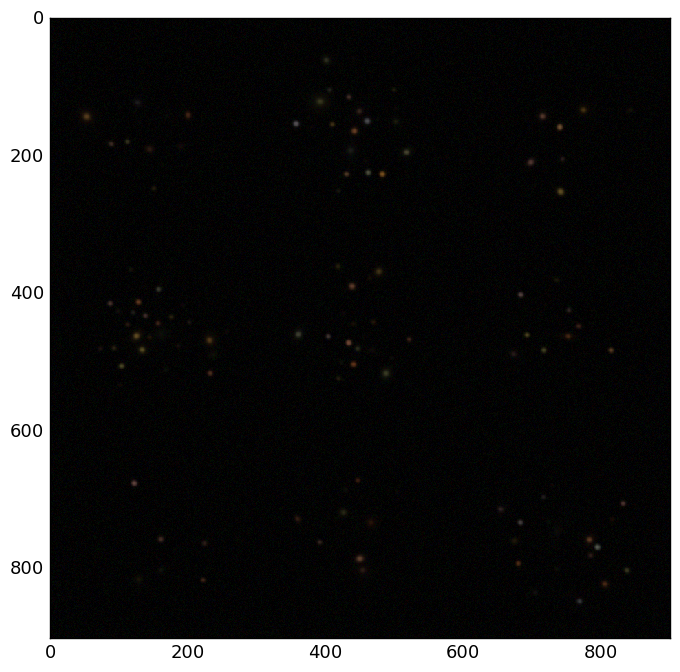

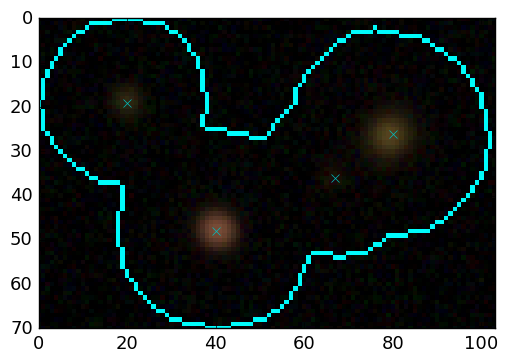

In [2]:
dataPath = os.path.abspath(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..','data', 'sim_data'))
filters = ["g","r", "i","z",'y']
imgFilename = os.path.join(dataPath, "test2/{0}_{1}.fits")
catFilename = os.path.join(dataPath, "test2/det_merge.fits")
simFilename = os.path.join(dataPath, "test2/catalog_true.fits")

expDb = proximal.ExposureDeblend(filters, imgFilename, catFilename, simFilename)
display.plotColorImage(calexps=expDb.calexps, filterIndices=[2,1,0], contrast=1, figsize=(8,8));
footprint, peaks = expDb.getParentFootprint(parentIdx=0, condition=expDb.mergedTable["peaks"]==4, contrast=1)

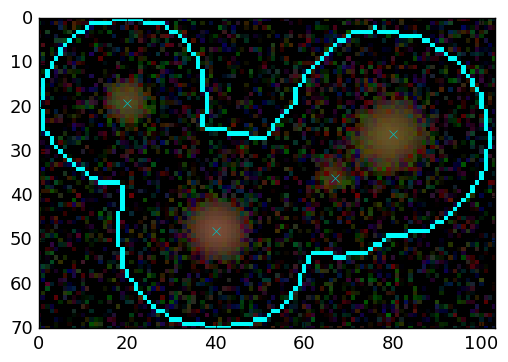

constraints MMMM
0 1.49262602623 0 112.306078189 999 [1, 1, 1, 1]
1 0.00251421984468 354 84.8004373212 334 [4339, 4492, 3879, 4247]
2 0.00197572140805 307 63.6475695295 159 [4757, 4637, 4765, 4771]
3 0.00148220785973 144 47.72843055 101 [4692, 4421, 4686, 4629]
4 0.00111237669424 173 35.7828684538 75 [4426, 4102, 4645, 4375]
5 0.000834898019724 201 26.8242761239 60 [4387, 3967, 4565, 4332]
6 0.000626323565021 232 20.1092192478 50 [4542, 4284, 4785, 4497]
7 0.000469796632682 261 15.0782518851 43 [4763, 4458, 4765, 4570]
8 0.000352357159297 0 11.3086882141 38 [4941, 4548, 4672, 4598]
9 0.000264260201492 1 8.48151567191 34 [5084, 4724, 4698, 4701]
10 0.000198185737516 0 6.36113679135 37 [5219, 4921, 4859, 4837]


INFO:lsst.meas.deblender.proximal:Filter g
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.397445887327
INFO:lsst.meas.deblender.proximal:Residual difference 5.2%
INFO:lsst.meas.deblender.proximal:Filter r
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.451697812808
INFO:lsst.meas.deblender.proximal:Residual difference 10.1%
INFO:lsst.meas.deblender.proximal:Filter i
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.38583966406
INFO:lsst.meas.deblender.proximal:Residual difference 7.5%
INFO:lsst.meas.deblender.proximal:Filter z
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.378056228161
INFO:lsst.meas.deblender.proximal:Residual difference 8.9%
INFO:lsst.meas.d

11 0.000148627091354 0 4.77085265896 40 [5104, 4766, 4737, 4693]


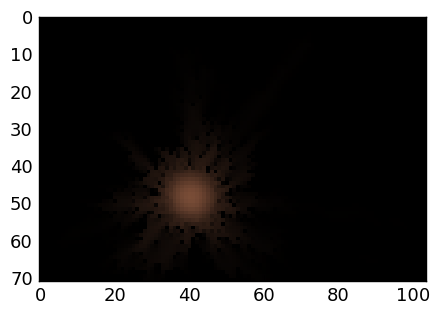

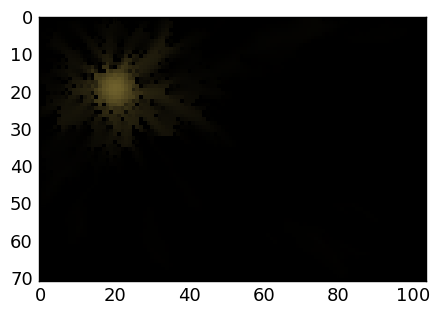

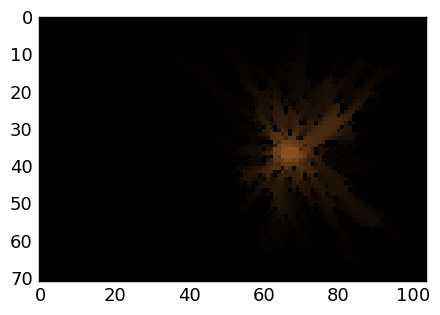

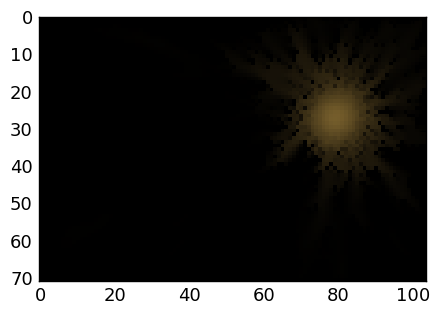

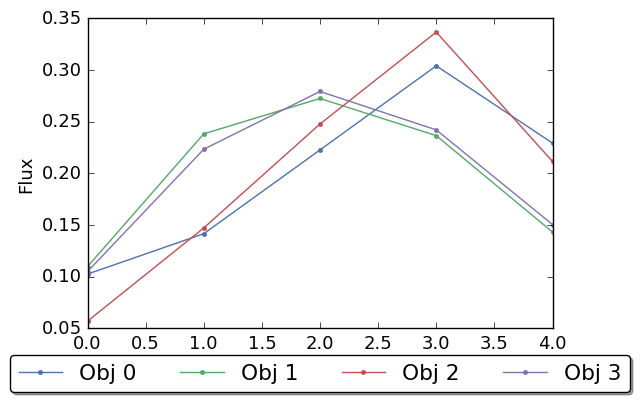

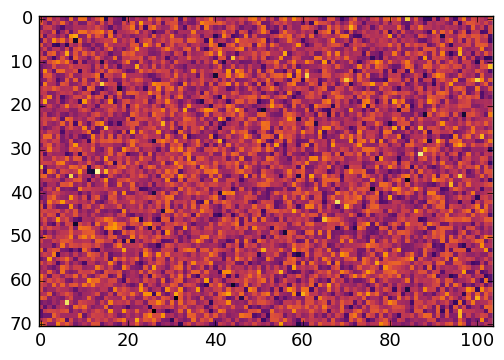

In [3]:
deblend = expDb.deblendParent(condition=expDb.mergedTable["peaks"]==4, display=True)

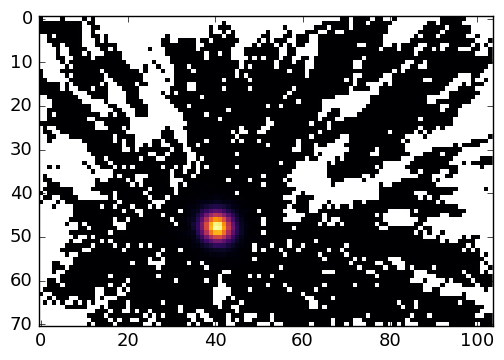

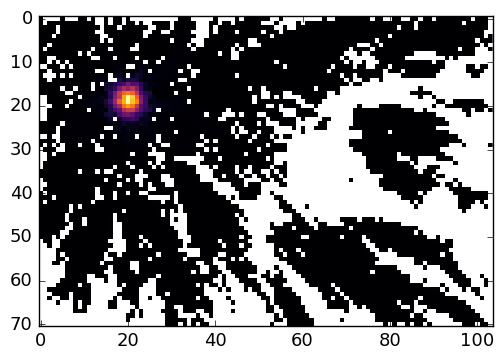

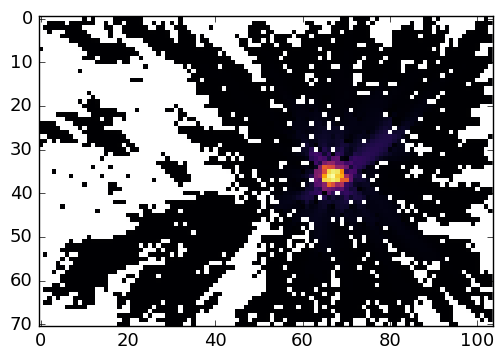

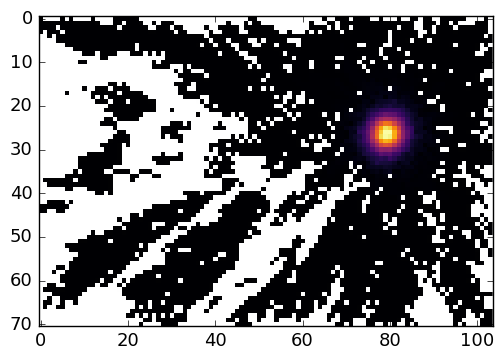

In [4]:
deblend.displayAllTemplates(0)

# Test the deblender with a symmetry constraint

We see that the results of the symmetry deblender look more like galaxies... but the monotonicity deblender does a much better job at matching the flux.

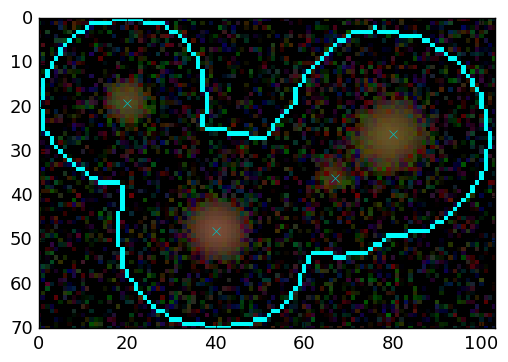

constraints SSSS
0 1.49262602623 0 112.306078189 999 [1, 1, 1, 1]
1 0.00161851966372 216 59.554496852 999 [2155, 1119, 2694, 1361]
2 0.00183382468714 582 62.7694877094 999 [2269, 1087, 2901, 1554]
3 0.00157229203727 401 48.4589395601 999 [1853, 929, 2459, 1289]
4 0.00121340825303 154 36.4338255928 999 [1787, 899, 2433, 1217]
5 0.000919436837273 75 27.3284118228 999 [1720, 826, 2368, 1164]
6 0.000693288627414 80 20.4954320145 999 [1688, 806, 2350, 1148]
7 0.000521861458619 90 15.3710891126 999 [1690, 797, 2332, 1136]
8 0.00039244492402 98 11.5280660753 999 [1676, 799, 2309, 1126]
9 0.000294915968452 104 8.64590064419 999 [1690, 794, 2310, 1120]
10 0.000221511927844 0 6.4844250521 999 [1675, 784, 2296, 1112]
11 0.000166316580339 0 4.86331838179 999 [1659, 778, 2278, 1102]
12 0.000124839921482 0 3.64748849066 999 [1656, 773, 2267, 1101]
13 9.36875131812e-05 0 2.73561617448 999 [1646, 772, 2262, 1097]
14 7.02979954394e-05 0 2.05171201079 999 [1643, 773, 2255, 1093]
15 5.27416795168e-05 0 1

INFO:lsst.meas.deblender.proximal:Filter g
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.584886002827
INFO:lsst.meas.deblender.proximal:Residual difference 20.9%
INFO:lsst.meas.deblender.proximal:Filter r
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.73806133858
INFO:lsst.meas.deblender.proximal:Residual difference 22.5%
INFO:lsst.meas.deblender.proximal:Filter i
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.895828503842
INFO:lsst.meas.deblender.proximal:Residual difference 20.1%
INFO:lsst.meas.deblender.proximal:Filter z
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 1.25883376924
INFO:lsst.meas.deblender.proximal:Residual difference 23.8%
INFO:lsst.meas

39 5.29729966429e-08 0 0.00154400213925 999 [1635, 765, 2233, 1087]


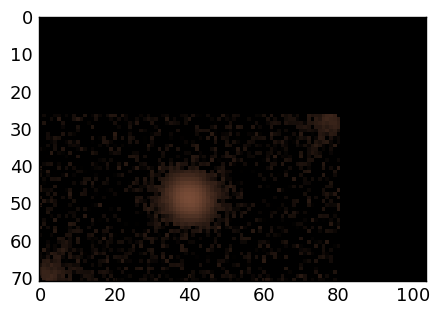

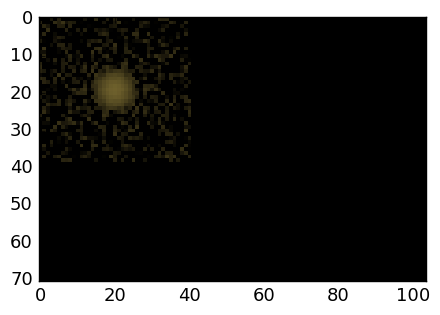

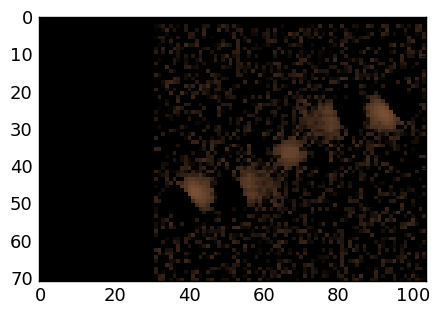

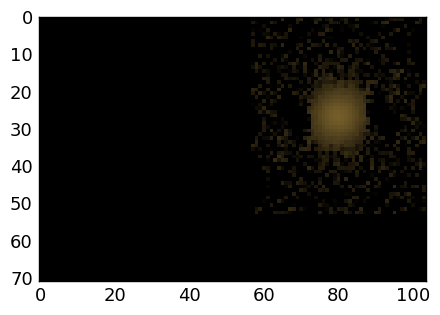

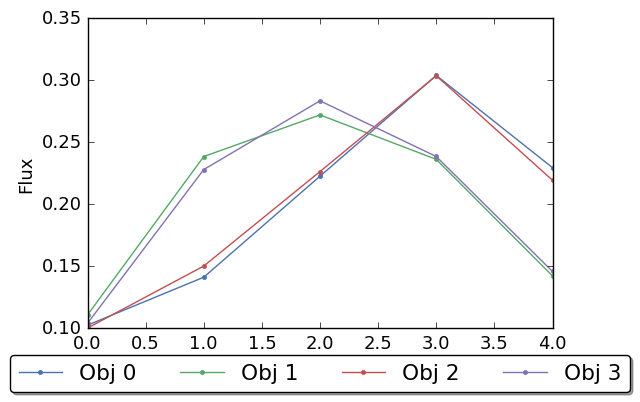

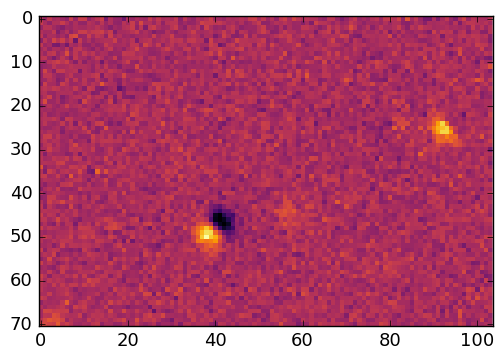

In [5]:
deblend = expDb.deblendParent(condition=expDb.mergedTable["peaks"]==4, display=True, constraints="S")

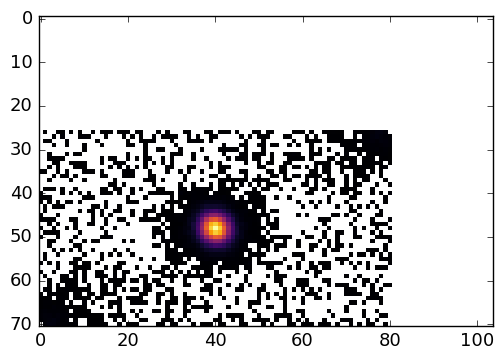

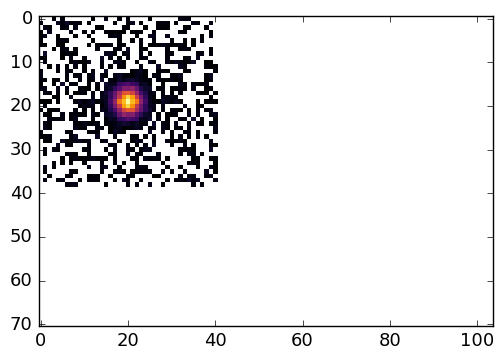

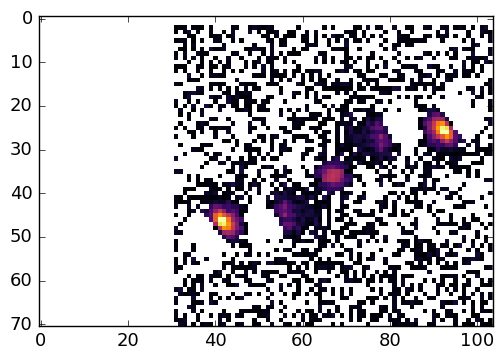

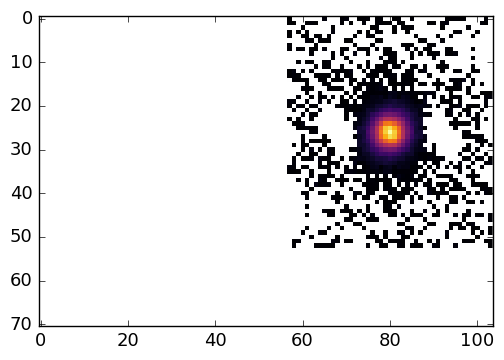

In [6]:
deblend.displayAllTemplates(0)